### Data processing for normal epitheial in this cohort, corresponding to Fig.2 and Fig.S1

In [ ]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as ticker
mpl.rcParams['font.family'] = 'Arial'
datapath = '../data'

In [ ]:
adata_epi_cnv = sc.read_h5ad('../data/adata-epi-cnv.h5ad')
adata_epi_cnv

AnnData object with n_obs × n_vars = 53019 × 39735
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'majorType-fix', 'cnv_leiden', 'cnv_score', 'cnv_status', 'IHC', 'epi-leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'CellphoneDB', 'IHC_colors', 'batch_colors', 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'cnv_status_colors', 'dendrogram_leiden', 'epi-leiden_colors', 'epi-subtype_colors', 'gender_colors', 'hvg', 'leiden', 'leiden-harmony-female_colors', 'leiden_colors'

In [ ]:
adata_epi_norm = adata_epi_cnv[adata_epi_cnv.obs['IHC']=='Normal']
adata_epi_norm

View of AnnData object with n_obs × n_vars = 16242 × 39735
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'majorType-fix', 'cnv_leiden', 'cnv_score', 'cnv_status', 'IHC', 'epi-leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'CellphoneDB', 'IHC_colors', 'batch_colors', 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'cnv_status_colors', 'dendrogram_leiden', 'epi-leiden_colors', 'epi-subtype_colors', 'gender_colors', 'hvg', 'leiden', 'leiden-harmony-female_colors', 'leiden

2024-12-06 08:38:57,481 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Ignoring processing doublet cells...


2024-12-06 08:39:14,564 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-12-06 08:39:14,745 - harmonypy - INFO - Iteration 1 of 20
2024-12-06 08:39:21,436 - harmonypy - INFO - Iteration 2 of 20
2024-12-06 08:39:27,862 - harmonypy - INFO - Iteration 3 of 20
2024-12-06 08:39:33,745 - harmonypy - INFO - Converged after 3 iterations
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/external/pp/_harmony_integrate.py:84: ImplicitModificationWarning: Setting element `.obsm['X_pca_harmony']` of view, initializing view as actual.
  adata.obsm[adjusted_basis] = harmony_out.Z_corr.T
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


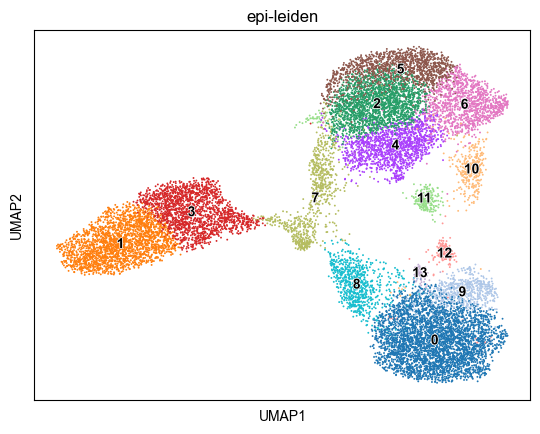

In [ ]:
adata_epi_norm = clu(adata_epi_norm, 'epi-leiden', n_pcs=30, do_har=True)

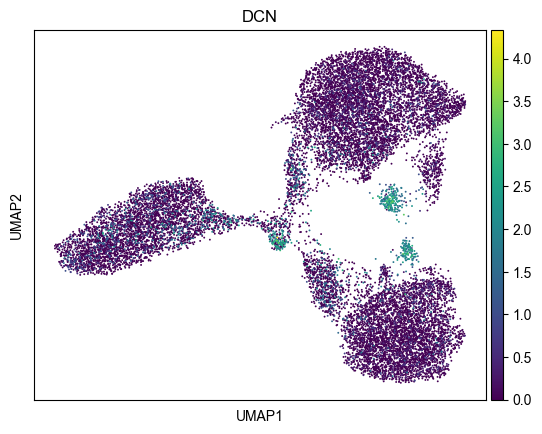

In [ ]:
sc.pl.umap(adata_epi_norm, color=['DCN'])

2024-12-06 08:41:49,978 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Ignoring processing doublet cells...


2024-12-06 08:42:08,381 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-12-06 08:42:08,503 - harmonypy - INFO - Iteration 1 of 20
2024-12-06 08:42:14,542 - harmonypy - INFO - Iteration 2 of 20
2024-12-06 08:42:20,877 - harmonypy - INFO - Iteration 3 of 20
2024-12-06 08:42:26,904 - harmonypy - INFO - Converged after 3 iterations
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/external/pp/_harmony_integrate.py:84: ImplicitModificationWarning: Setting element `.obsm['X_pca_harmony']` of view, initializing view as actual.
  adata.obsm[adjusted_basis] = harmony_out.Z_corr.T
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


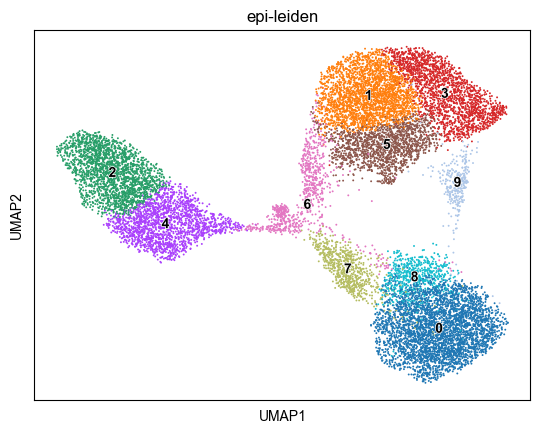

In [ ]:
adata_epi_norm = adata_epi_norm[~adata_epi_norm.obs['epi-leiden'].isin(['11', '12', '13'])]
adata_epi_norm = clu(adata_epi_norm, 'epi-leiden', n_pcs=30, do_har=True, resolution=1)

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


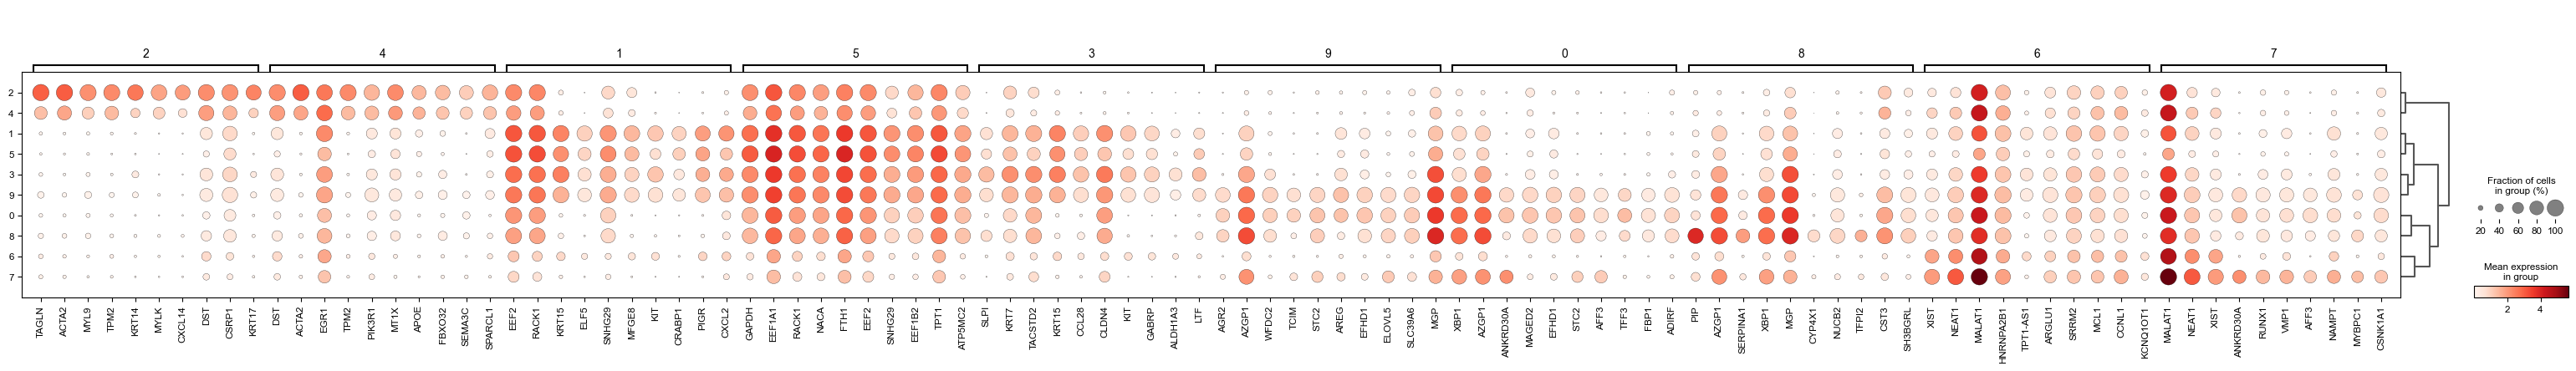

In [ ]:
sc.tl.rank_genes_groups(adata_epi_norm, groupby='epi-leiden', method='wilcoxon')
sc.tl.dendrogram(adata_epi_norm, groupby='epi-leiden')
sc.pl.rank_genes_groups_dotplot(adata_epi_norm, groupby='epi-leiden')

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


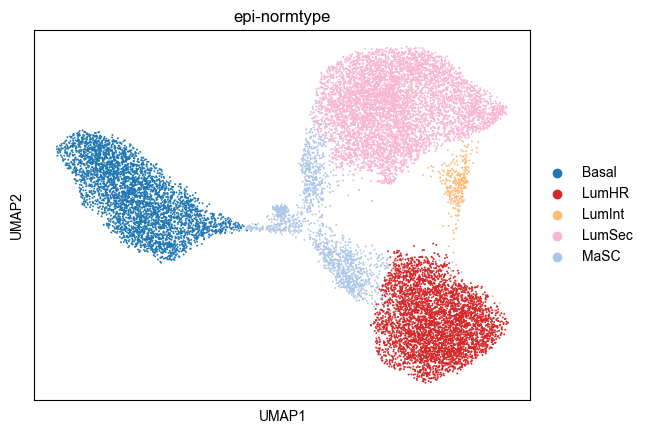

In [ ]:
adata_epi_norm.obs['epi-normtype'] = 'MaSC'
adata_epi_norm.obs.loc[adata_epi_norm.obs['epi-leiden'].isin(['1', '3', '5']),'epi-normtype'] = 'LumSec'
adata_epi_norm.obs.loc[adata_epi_norm.obs['epi-leiden'].isin(['2', '4']),'epi-normtype'] = 'Basal'
adata_epi_norm.obs.loc[adata_epi_norm.obs['epi-leiden'].isin(['0', '8']),'epi-normtype'] = 'LumHR'
adata_epi_norm.obs.loc[adata_epi_norm.obs['epi-leiden'].isin(['9']),'epi-normtype'] = 'LumInt'
sc.pl.umap(adata_epi_norm, color=['epi-normtype'], palette=['#1f77b4', '#d62728', '#ffbb78', '#f7b6d2', '#aec7e8'])

In [ ]:
adata_epi_norm.write_h5ad(f"{datapath}/adata-epi-norm.h5ad")